In [1]:
!pip3 install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=954eaca78373ed677bf4c6e9b34c98022ada8e0ee25d25bc4bdeee9fe538d409
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np 
import pandas as pd 
import librosa
import os
from IPython.display import display
import matplotlib.pyplot as plt 
%matplotlib inline
from tqdm import tqdm
from scipy.io import wavfile as wav
from python_speech_features import mfcc, logfbank
import IPython.display as ipd
import librosa.display
import struct



In [3]:
train_data_dir = '../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/Train/'
test_data_dir = '../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/Test/'
tr = os.path.join(train_data_dir)
ts = os.path.join(test_data_dir)
categories = []
test_list = []
train_list = []
for i in sorted(os.listdir(tr)):
    categories.append(i)
for i in sorted(os.listdir(ts)):
    test_list.append("Test/"+i)
for sound_id, sp in enumerate(categories):
    for file in sorted(os.listdir(os.path.join(tr, sp))):
        train_list.append(['Train/{}/{}'.format(sp,file), sound_id, sp])
        
train = pd.DataFrame(train_list, columns=['File', 'Id','Sound_Type'])
test = pd.DataFrame(test_list, columns=['File'])
display(train.tail())
display(test)

,File,Id,Sound_Type
3801,Train/surprise/surprise (95).wav,6,surprise
3802,Train/surprise/surprise (96).wav,6,surprise
3803,Train/surprise/surprise (97).wav,6,surprise
3804,Train/surprise/surprise (98).wav,6,surprise
3805,Train/surprise/surprise (99).wav,6,surprise


,File
0,Test/1.wav
1,Test/10.wav
2,Test/100.wav
3,Test/101.wav
4,Test/102.wav
...,...
250,Test/95.wav
251,Test/96.wav
252,Test/97.wav
253,Test/98.wav


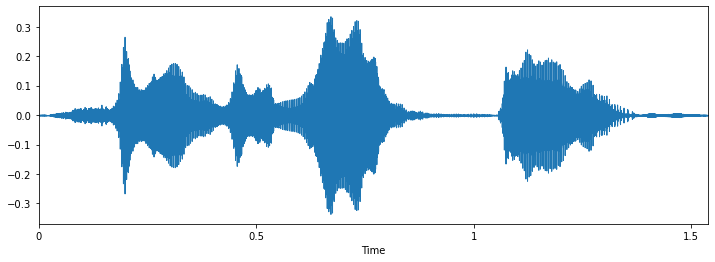

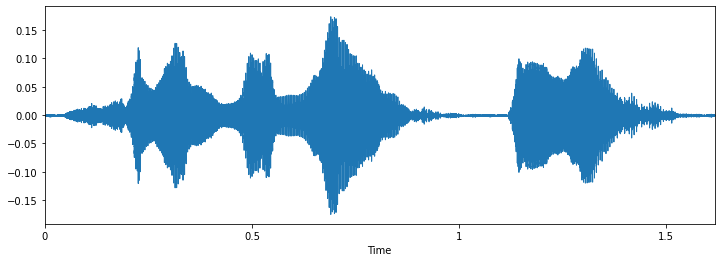

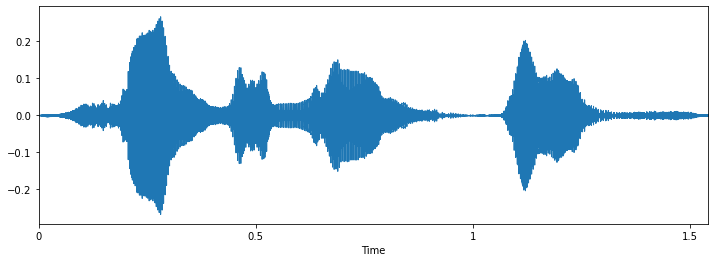

In [4]:
for i in range (1,4):
    filename = '../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/Train/angry/angry ('+str(i)+').wav'
    plt.figure(figsize=(12,4))
    data,sample_rate = librosa.load(filename)
    _ = librosa.display.waveplot(data,sr=sample_rate)
  

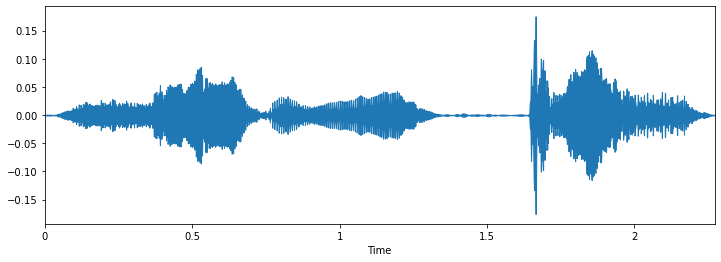

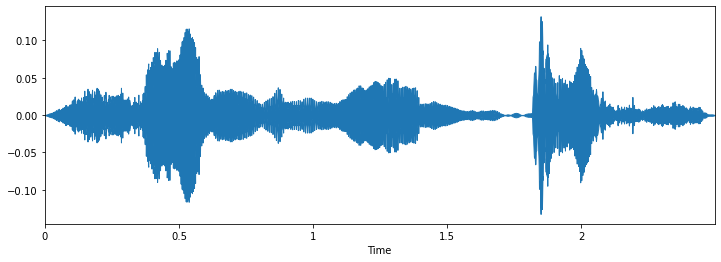

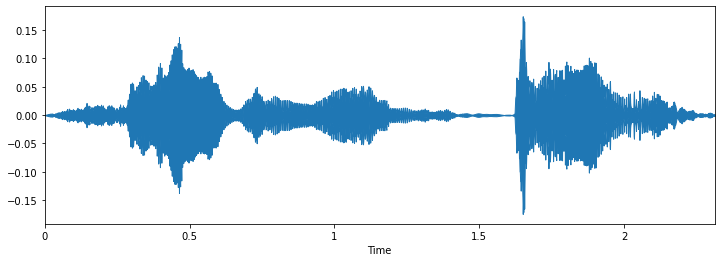

In [5]:
for i in range (1,4):
    filename = '../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/Train/disgust/disgust ('+str(i)+').wav'
    plt.figure(figsize=(12,4))
    data,sample_rate = librosa.load(filename)
    _ = librosa.display.waveplot(data,sr=sample_rate)
  

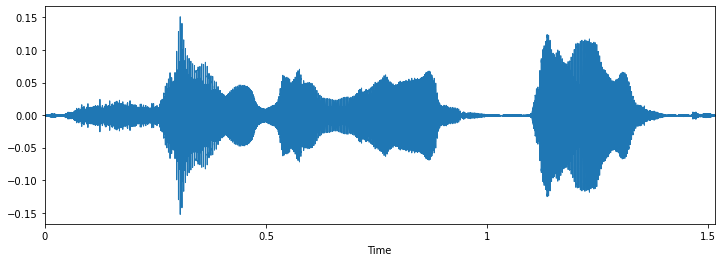

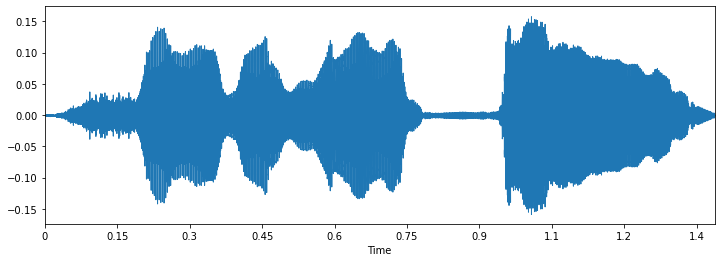

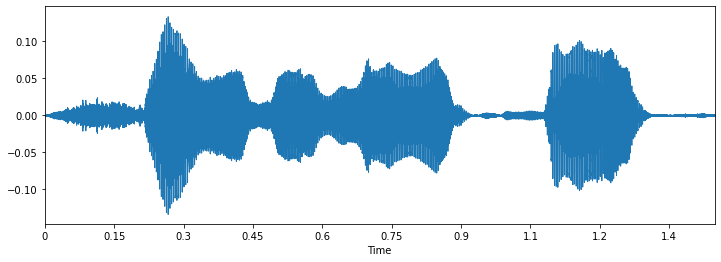

In [6]:
for i in range (1,4):
    filename = '../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/Train/fear/fear ('+str(i)+').wav'
    plt.figure(figsize=(12,4))
    data,sample_rate = librosa.load(filename)
    _ = librosa.display.waveplot(data,sr=sample_rate)
  

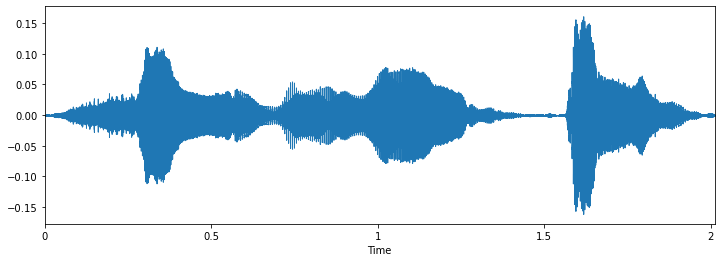

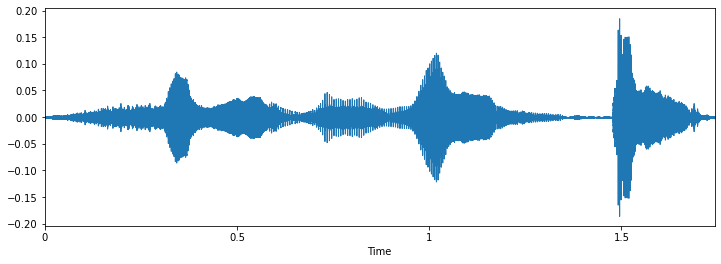

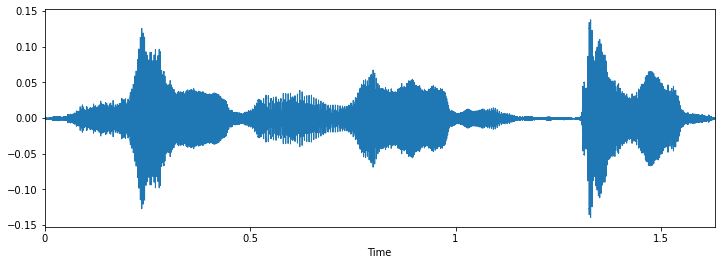

In [7]:
for i in range (1,4):
    filename = '../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/Train/happy/happy ('+str(i)+').wav'
    plt.figure(figsize=(12,4))
    data,sample_rate = librosa.load(filename)
    _ = librosa.display.waveplot(data,sr=sample_rate)
  

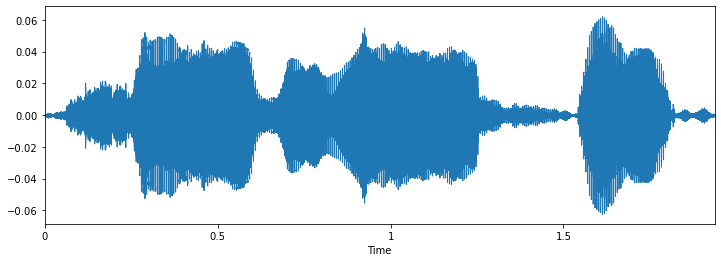

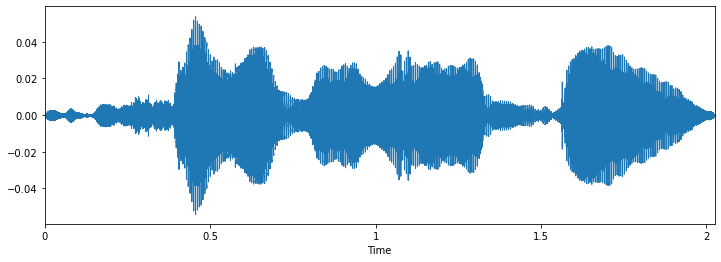

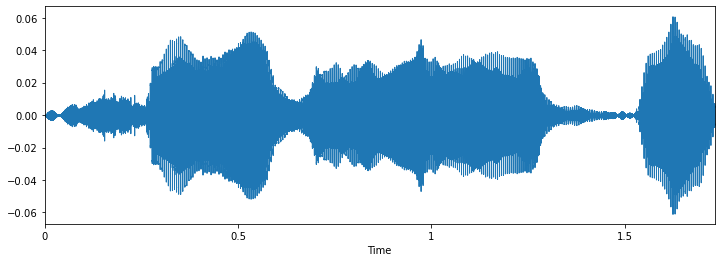

In [8]:
for i in range (1,4):
    filename = '../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/Train/neutral/neutral ('+str(i)+').wav'
    plt.figure(figsize=(12,4))
    data,sample_rate = librosa.load(filename)
    _ = librosa.display.waveplot(data,sr=sample_rate)
  

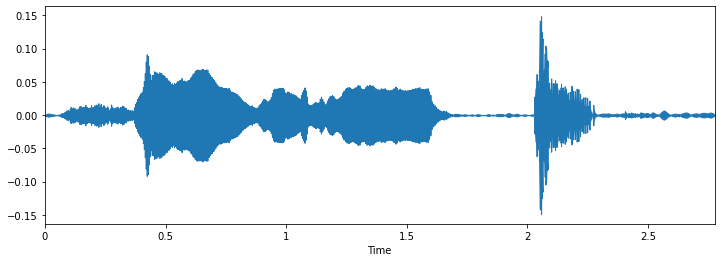

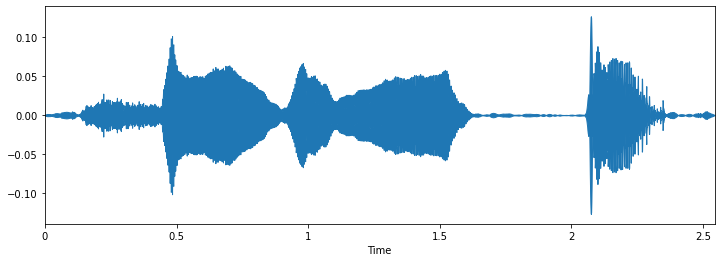

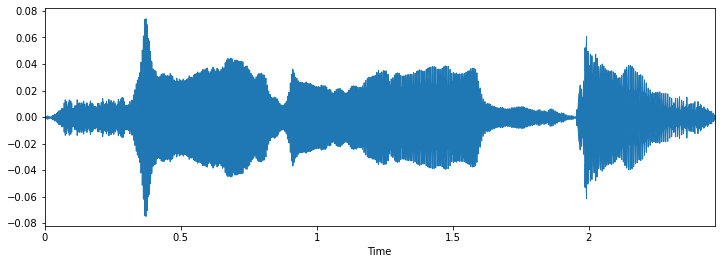

In [9]:
for i in range (1,4):
    filename = '../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/Train/sad/sad ('+str(i)+').wav'
    plt.figure(figsize=(12,4))
    data,sample_rate = librosa.load(filename)
    _ = librosa.display.waveplot(data,sr=sample_rate)
  

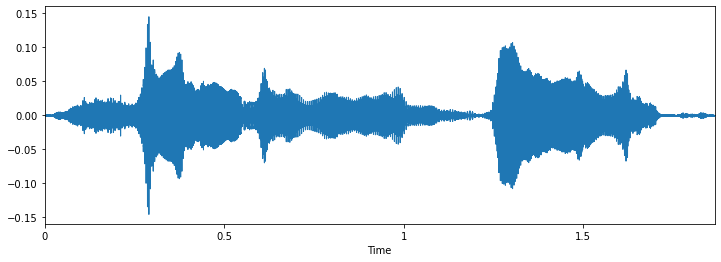

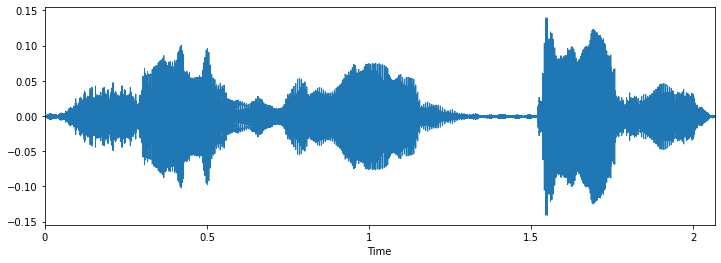

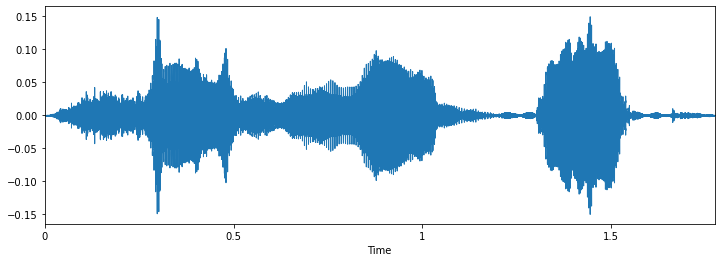

In [10]:
for i in range (1,4):
    filename = '../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/Train/surprise/surprise ('+str(i)+').wav'
    plt.figure(figsize=(12,4))
    data,sample_rate = librosa.load(filename)
    _ = librosa.display.waveplot(data,sr=sample_rate)
  

In [11]:

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open("../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/"+filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

wavfilehelper = WavFileHelper()
audiodata = []
for index, row in train.iterrows():

    
    file_name = os.path.join(row.File)
    #print(file_name)
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [12]:
display(audiodf.sample_rate.value_counts(normalize=True))

24414         0.701524
48000         0.297951
1296912195    0.000263
96000         0.000263
Name: sample_rate, dtype: float64

In [13]:
display(audiodf.num_channels.value_counts(normalize=True))

1        0.999475
16465    0.000263
2        0.000263
Name: num_channels, dtype: float64

In [14]:
display(audiodf.bit_depth.value_counts(normalize=True))

16    0.999737
0     0.000263
Name: bit_depth, dtype: float64

In [15]:
def displayPlot(filename):
    #print(filename)
    SR = 17000
    librosa_audio, librosa_sample_rate = librosa.load("../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/"+filename, sr=SR) 

    plt.figure()

    mfccs = librosa.feature.mfcc(y=librosa_audio, sr=SR, n_mfcc=70, norm='ortho')
    #print(mfccs.shape)
    librosa.display.specshow(mfccs, sr=SR, x_axis='time')

ANGRY


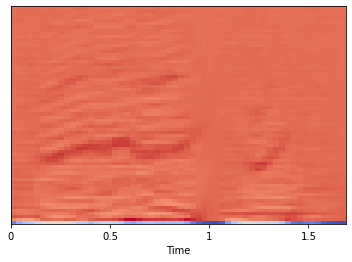

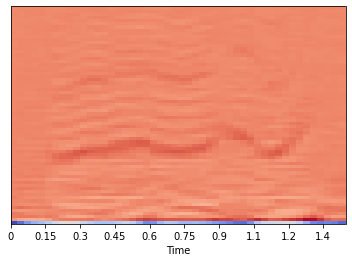

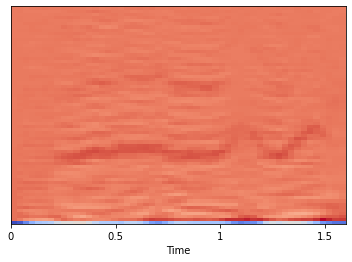

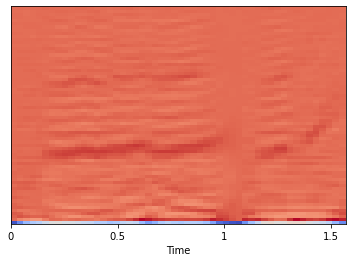

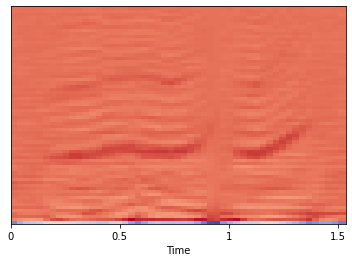

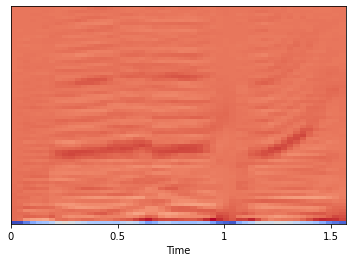

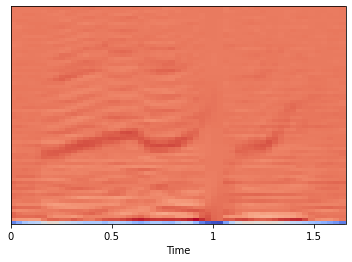

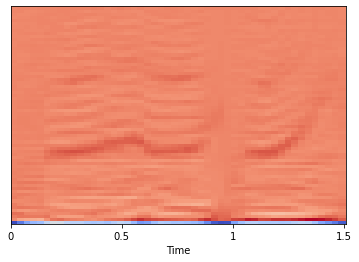

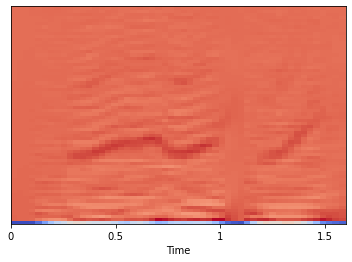

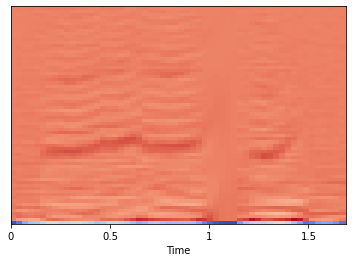

In [16]:
print("ANGRY")
for i in range(10):
    displayPlot(train.File[i+1])

DISGUST


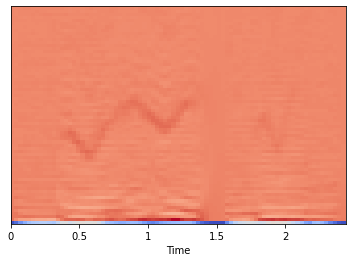

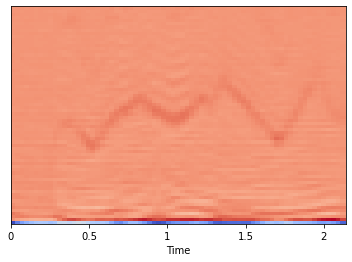

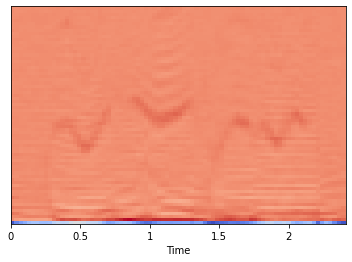

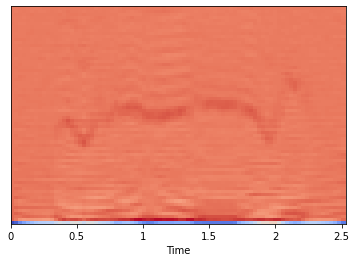

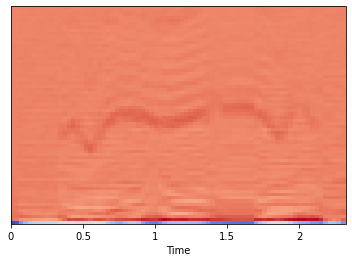

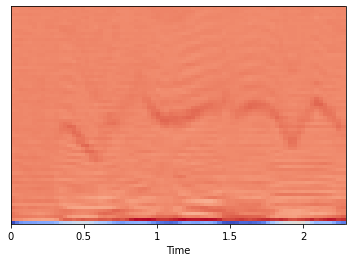

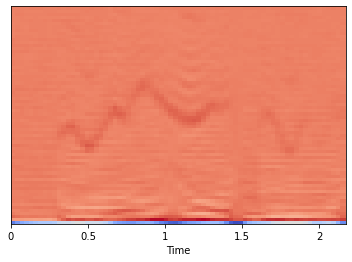

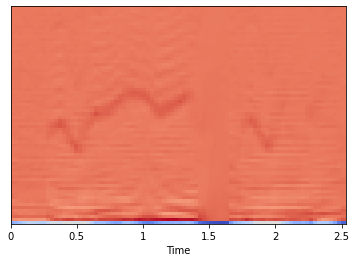

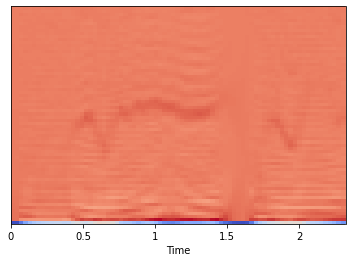

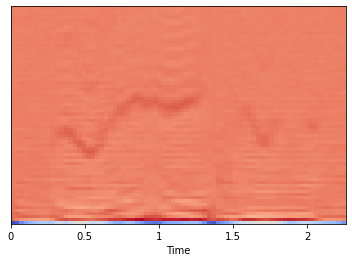

In [17]:
print("DISGUST")
for i in range(10):
    displayPlot(train.File[i+559])

FEAR


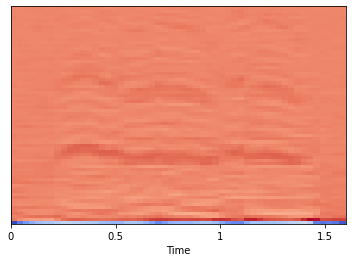

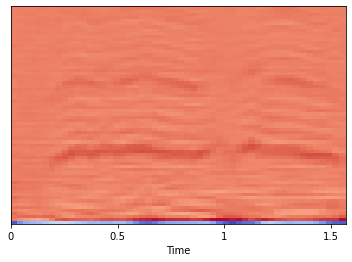

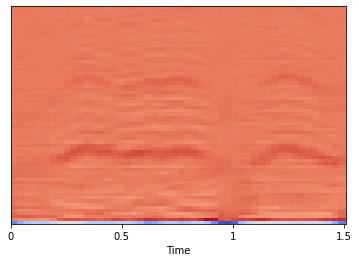

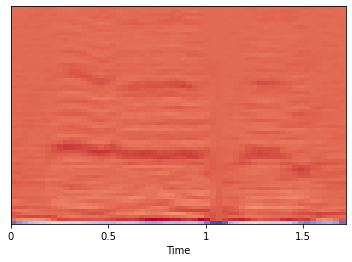

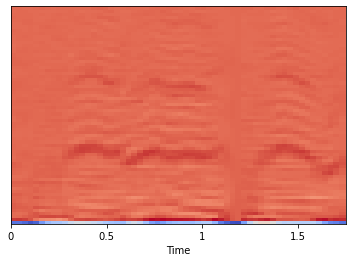

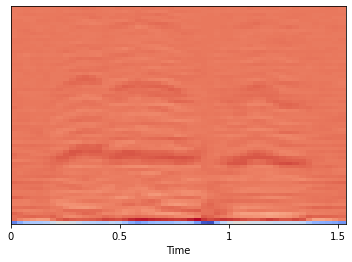

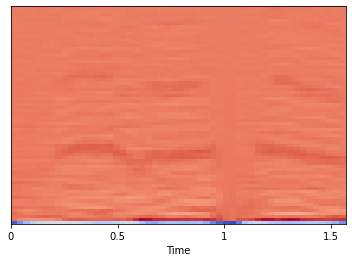

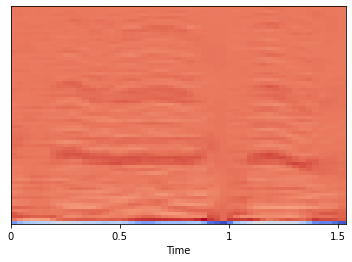

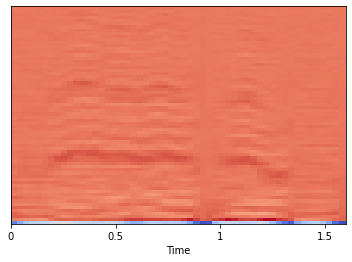

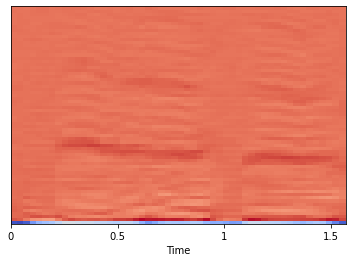

In [18]:
print("FEAR")
for i in range(10):
    displayPlot(train.File[i+1115])

HAPPY


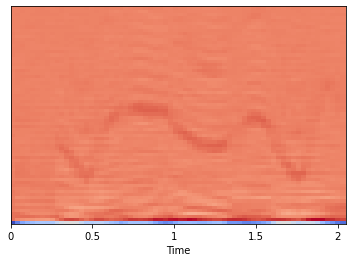

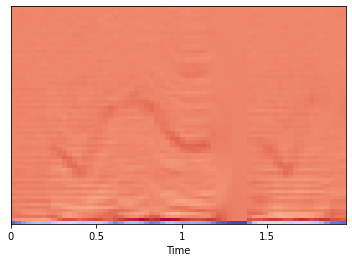

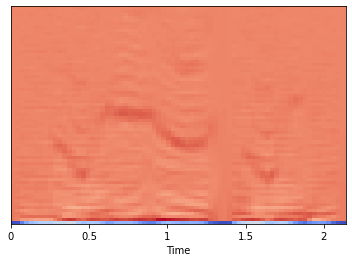

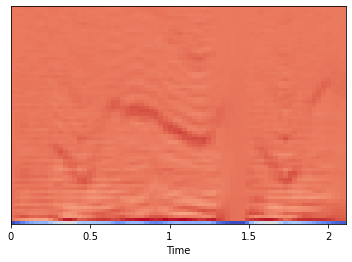

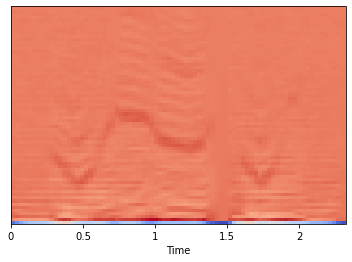

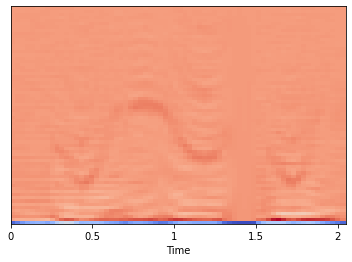

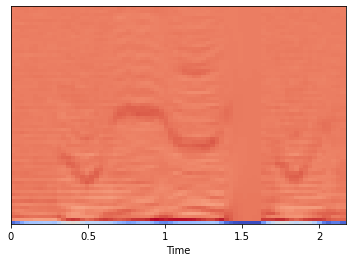

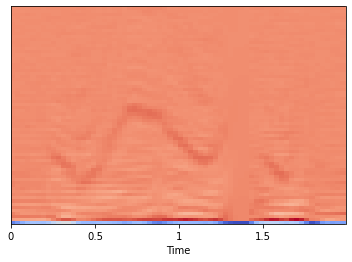

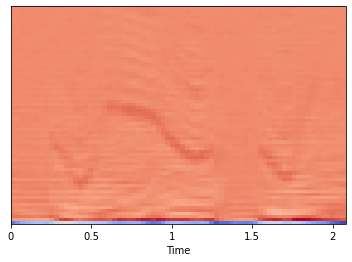

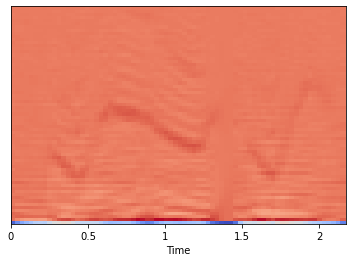

In [19]:
print("HAPPY")
for i in range(10):
    displayPlot(train.File[i+1675])

NEUTRAL


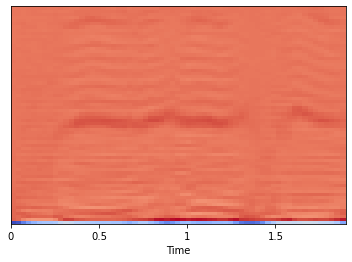

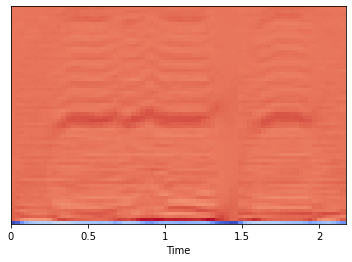

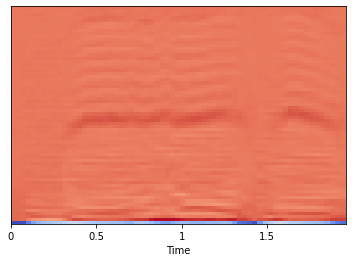

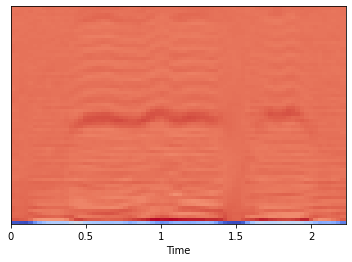

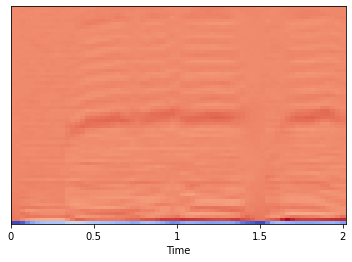

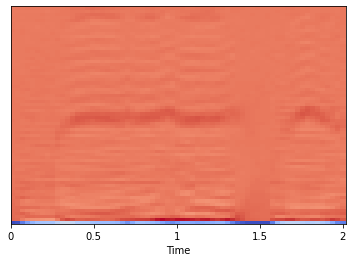

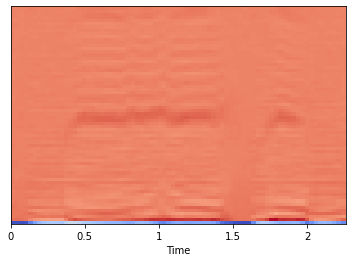

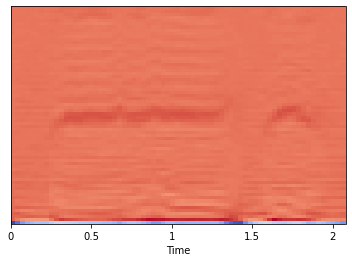

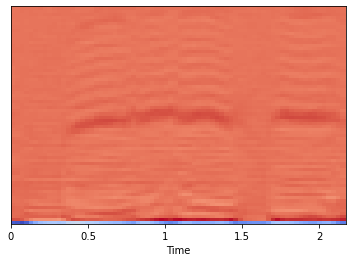

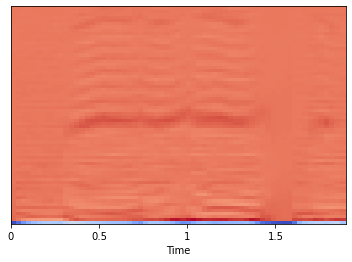

In [20]:
print("NEUTRAL")
for i in range(10):
    displayPlot(train.File[i+2230])

SAD


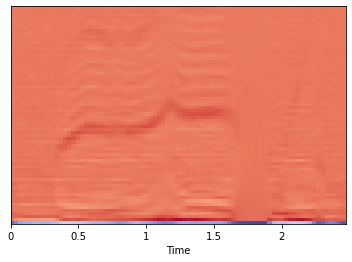

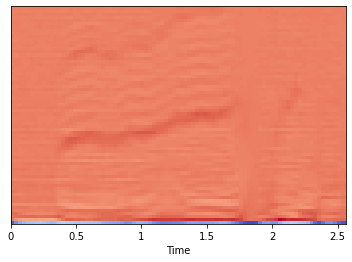

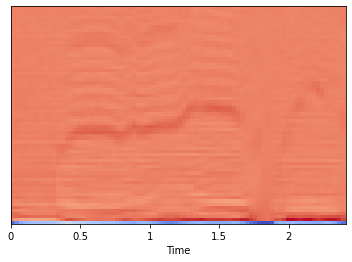

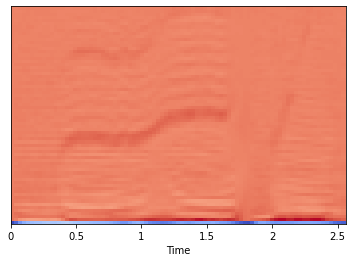

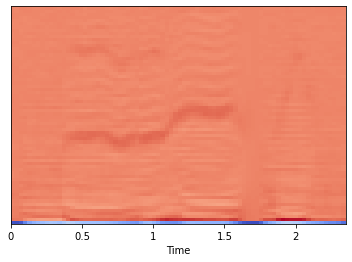

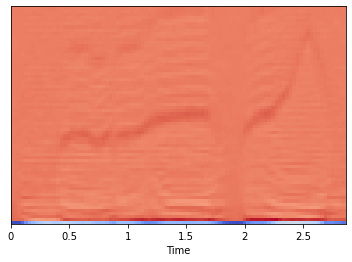

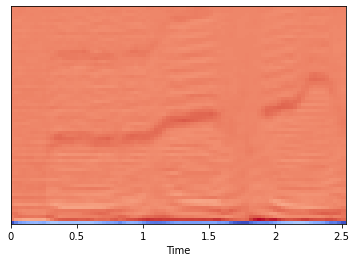

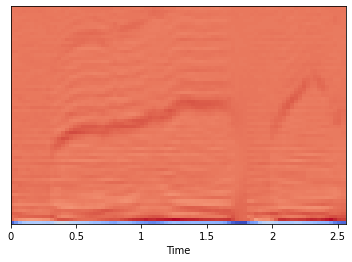

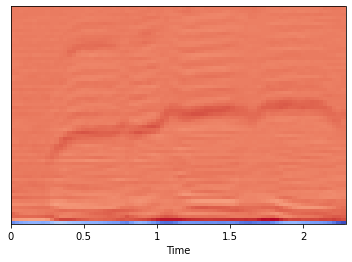

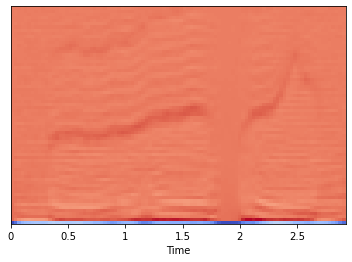

In [21]:
print("SAD")
for i in range(10):
    displayPlot(train.File[i+2700])

SURPRISE


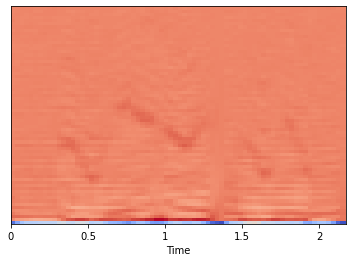

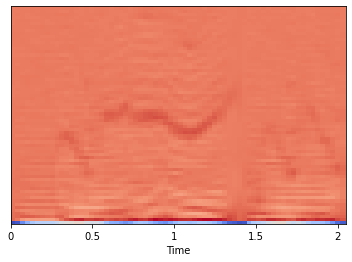

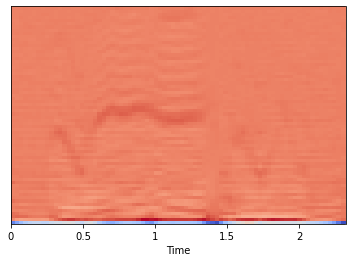

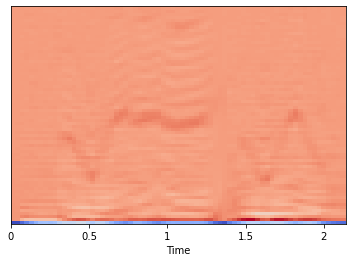

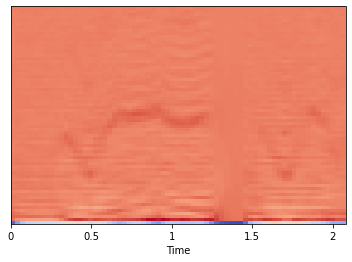

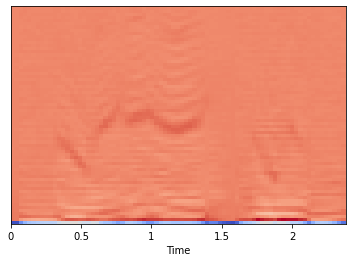

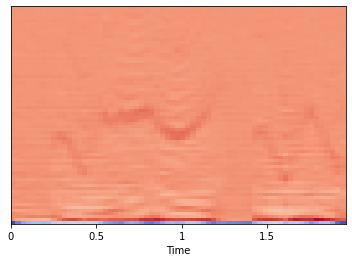

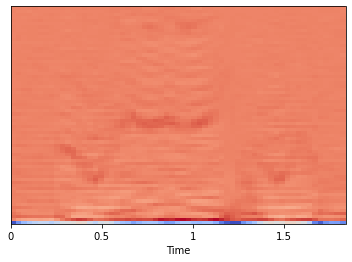

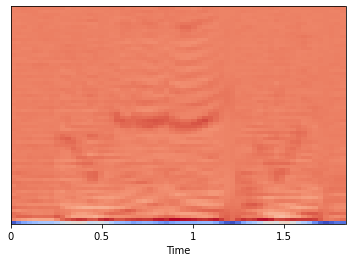

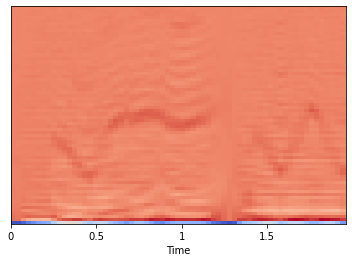

In [22]:
print("SURPRISE")
for i in range(10):
    displayPlot(train.File[i+3250])

In [23]:
max_pad_len = 110

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr = 17000) 
        mfccs = librosa.feature.mfcc(y=audio,sr=17000, n_mfcc=70)
        #pad_width = max_pad_len - mfccs.shape[1]
        #mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [24]:
fulldatasetpath = '../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/'

features = []

# Iterate through each sound file and extract the features 
for index, row in tqdm(train.iterrows()):
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),row.File)
    name = row.File
    class_label = row.Sound_Type
    sound_id = row.Id
    data = extract_features(file_name)
    
    features.append([name, data, class_label, sound_id])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['name', 'feature','class_label','id'])

print('Finished feature extraction from ', len(featuresdf), ' files')

3806it [01:43, 36.66it/s]

Finished feature extraction from  3806  files


In [25]:
featuresdf.head()

,name,feature,class_label,id
0,Train/angry/angry (1).wav,"[[-585.84174, -512.8228, -414.38693, -367.6201...",angry,0
1,Train/angry/angry (10).wav,"[[-540.9909, -452.88187, -401.17133, -387.9948...",angry,0
2,Train/angry/angry (100).wav,"[[-593.156, -532.3889, -455.3027, -401.55887, ...",angry,0
3,Train/angry/angry (101).wav,"[[-638.2052, -614.6014, -533.11926, -441.81787...",angry,0
4,Train/angry/angry (102).wav,"[[-657.0344, -563.62, -456.51935, -404.13913, ...",angry,0


In [26]:
featuresdf.to_csv('Train_data.csv')

In [27]:
fulldatasetpath = '../input/enigma-techtatva-2020/Dr Sheldon Cooper/Dr Sheldon Cooper/'

features = []

# Iterate through each sound file and extract the features 
for index, row in tqdm(test.iterrows()):
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),row.File)
    
    #class_label = row.Sound_Type
    #sound_id = row.Id
    name = test.File
    data = extract_features(file_name)
    
    features.append([name, data])

# Convert into a Panda dataframe 
testdf = pd.DataFrame(features, columns=['name','feature'])

print('Finished feature extraction from ', len(testdf), ' files')

255it [00:08, 30.12it/s]

Finished feature extraction from  255  files


In [28]:
testdf.to_csv('Audio_test.csv')

In [29]:

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = featuresdf.feature.to_numpy()
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
Y = to_categorical(le.fit_transform(y))

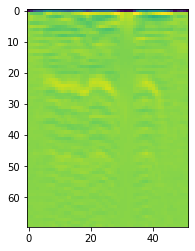

In [30]:
plt.imshow(X[0])

In [31]:
from sklearn.model_selection import train_test_split 

x_train, x_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.05, random_state = 42)

In [32]:
import cv2
X_train = []
X_val = []
for i in x_train:
    norm_image = cv2.normalize(i, None, 0, 1, norm_type=cv2.NORM_MINMAX)
    norm_image =cv2.resize(norm_image,(80,80), interpolation = cv2.INTER_CUBIC)   
    #kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    #norm_image = cv2.filter2D(norm_image, -1, kernel)
    X_train.append(norm_image)
for i in x_val:
    norm_image = cv2.normalize(i, None, 0, 1, norm_type=cv2.NORM_MINMAX)
    norm_image =cv2.resize(norm_image,(80,80), interpolation = cv2.INTER_CUBIC)   
    #kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    #norm_image = cv2.filter2D(norm_image, -1, kernel)
    X_val.append(norm_image)
X_train = np.array(X_train)
X_val = np.array(X_val)



In [33]:
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)
X_train = np.stack((X_train,)*3, axis=-1)
X_val = np.stack((X_val,)*3, axis=-1)
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(3615, 80, 80) (191, 80, 80) (3615, 7) (191, 7)
(3615, 80, 80, 3) (191, 80, 80, 3) (3615, 7) (191, 7)


In [34]:
X_train_max = X_train.max()
X_train_min = X_train.min()

X_test_max = X_val.max()
X_test_min = X_val.min()
print(X_train_max,X_train_min,X_test_max,X_test_min)

1.0184917 -0.08053048 1.0201119 -0.07692071


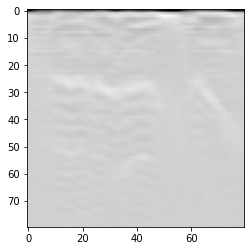

In [35]:
plt.imshow(X_train[0])

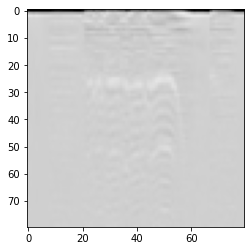

In [36]:
plt.imshow(X_val[0])

In [41]:
from tensorflow.keras.applications import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [38]:
input_shape = (80,80,3)
print(input_shape)
model = Sequential()
model.add(Xception(include_top = False, pooling = MaxPool2D,input_shape= input_shape, weights = 'imagenet'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(502, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))
model.summary()
optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay = 0.0)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])

(80, 80, 3)
83689472/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 18432)             73728     
_________________________________________________________________
dropout (Dropout)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 502)               9253366   
_________________________________________________________________
batch_normalization_5 (Batch (None, 502)               2008      
_____________________________________________

In [44]:
BATCH_SIZE = 64
datagen = ImageDataGenerator(
    shear_range=0.05,
    zoom_range=0.2)
datagen.fit(X_train)
annealer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = tf.keras.callbacks.ModelCheckpoint('AudioCLassifier.h5', verbose=1, save_best_only=True)
model.fit_generator(datagen.flow(X_train,Y_train, batch_size=BATCH_SIZE),
steps_per_epoch=X_train.shape[0] // BATCH_SIZE, epochs=200,verbose=1, callbacks=[annealer, checkpoint], validation_data = (X_val, Y_val))

Epoch 1/200
56/56 [==============================] - ETA: 0s - loss: 2.4157 - accuracy: 0.1721
Epoch 00001: val_loss improved from inf to 1.96179, saving model to AudioCLassifier.h5
56/56 [==============================] - 11s 195ms/step - loss: 2.4157 - accuracy: 0.1721 - val_loss: 1.9618 - val_accuracy: 0.1204
Epoch 2/200
56/56 [==============================] - ETA: 0s - loss: 1.9641 - accuracy: 0.2388
Epoch 00002: val_loss improved from 1.96179 to 1.93023, saving model to AudioCLassifier.h5
56/56 [==============================] - 10s 172ms/step - loss: 1.9641 - accuracy: 0.2388 - val_loss: 1.9302 - val_accuracy: 0.1623
Epoch 3/200
56/56 [==============================] - ETA: 0s - loss: 1.6093 - accuracy: 0.3689
Epoch 00003: val_loss did not improve from 1.93023
56/56 [==============================] - 9s 156ms/step - loss: 1.6093 - accuracy: 0.3689 - val_loss: 1.9433 - val_accuracy: 0.1571
Epoch 4/200
56/56 [==============================] - ETA: 0s - loss: 1.3119 - accuracy: 0.4

In [45]:
Test_X = testdf.feature.to_numpy()
X_test = []
for i in Test_X:
    norm_image = cv2.normalize(i, None, 0, 1, norm_type=cv2.NORM_MINMAX)
    norm_image =cv2.resize(norm_image,(80,80), interpolation = cv2.INTER_CUBIC)   
    #kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    #norm_image = cv2.filter2D(norm_image, -1, kernel)
    X_test.append(norm_image)

In [46]:
X_test = np.array(X_test)
X_test.shape
X_test = np.stack((X_test,)*3, axis=-1)

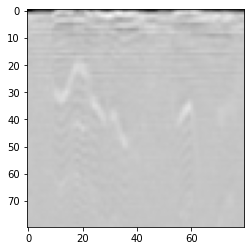

In [47]:
plt.imshow(X_test[0])

In [48]:
predictions = model.predict(X_test)

In [49]:
pred = np.argmax(predictions, axis = 1)